# Loan Application Status Prediction

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dipesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import the dataset
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Pre Processing

In [3]:
#checking the shape of the dataset
df.shape

(614, 13)

In [4]:
#checking nulls in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#nulls in terms of percentage
df.isnull().sum() / df.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [6]:
# reading each columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#checking the data types of each columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# Importing Simple imputer to treat the nulls
from sklearn.impute import SimpleImputer

In [9]:
# strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['Gender', 'Married', 'Dependents','Self_Employed']])
df[['Gender', 'Married', 'Dependents','Self_Employed']] = imputer.transform(df[['Gender', 'Married', 'Dependents','Self_Employed']])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# strategy='mean'
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['LoanAmount','Loan_Amount_Term', 'Credit_History']])
df[['LoanAmount','Loan_Amount_Term', 'Credit_History']] = imputer.transform(df[['LoanAmount','Loan_Amount_Term', 'Credit_History']])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [11]:
# checking nulls after treating nulls to see any column left
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# again checking the datatypes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## EDA and Visualization

********************
Male      502
Female    112
Name: Gender, dtype: int64
********************


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

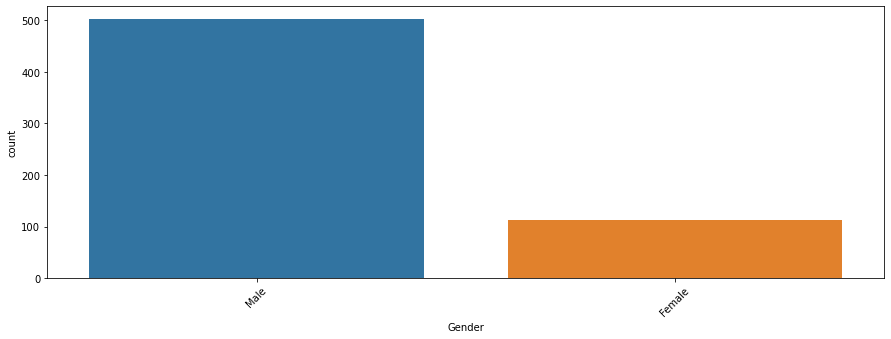

In [14]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Gender', data = df)
print('*'*20)
print(df.Gender.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

### From Countplot we observe there are almost 80% male and 20% female

********************
Yes    401
No     213
Name: Married, dtype: int64
********************


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

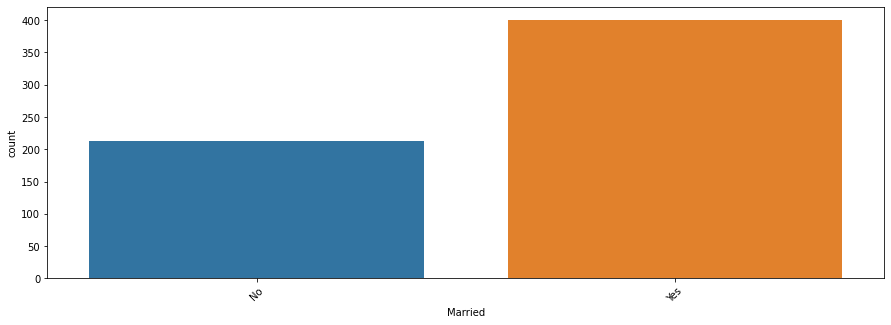

In [15]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Married', data = df)
print('*'*20)
print(df.Married.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

### From Countplot we observe there is a large number of married people.

********************
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
********************


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')])

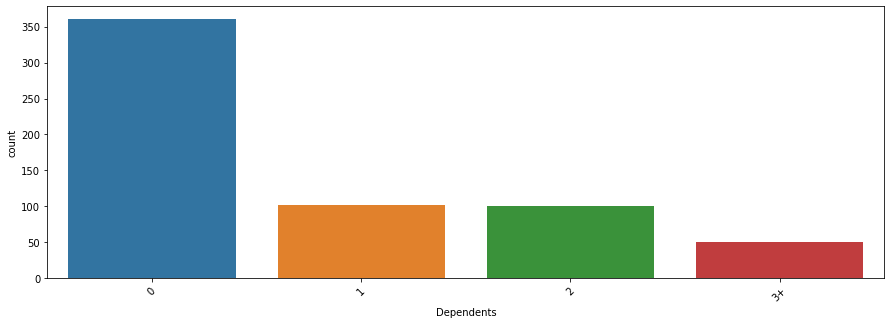

In [16]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Dependents', data = df)
print('*'*20)
print(df.Dependents.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

### So there are 4 Dependents and the 0th Dependents contribute the most followed by 1 & 2 and the least is 3+

********************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
********************


(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

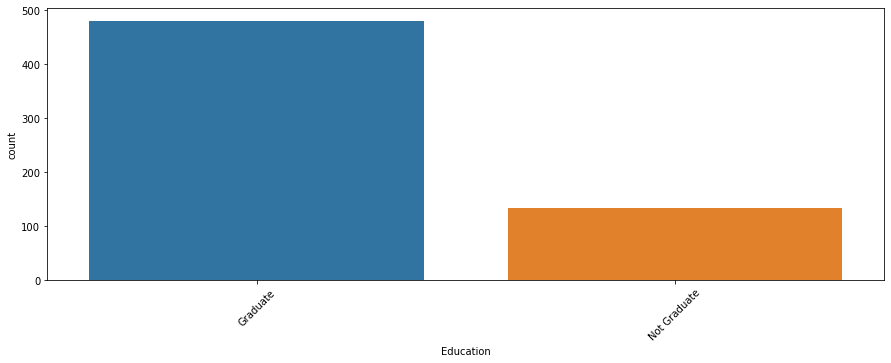

In [17]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Education', data = df)
print('*'*20)
print(df.Education.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

### From the above graph, we observe there is more number of graduate people.

********************
No     532
Yes     82
Name: Self_Employed, dtype: int64
********************


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

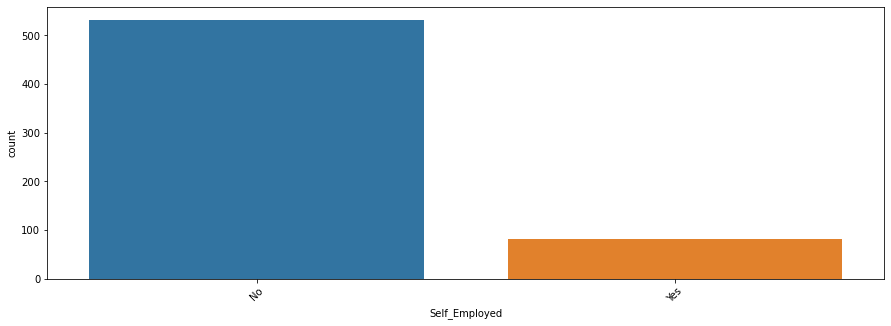

In [18]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Self_Employed', data = df)
print('*'*20)
print(df.Self_Employed.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

### From Countplot we observe that around 90%people are not self-employed and only 10% of people have their own business.

********************
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
********************


(array([0, 1, 2]),
 [Text(0, 0, 'Urban'), Text(1, 0, 'Rural'), Text(2, 0, 'Semiurban')])

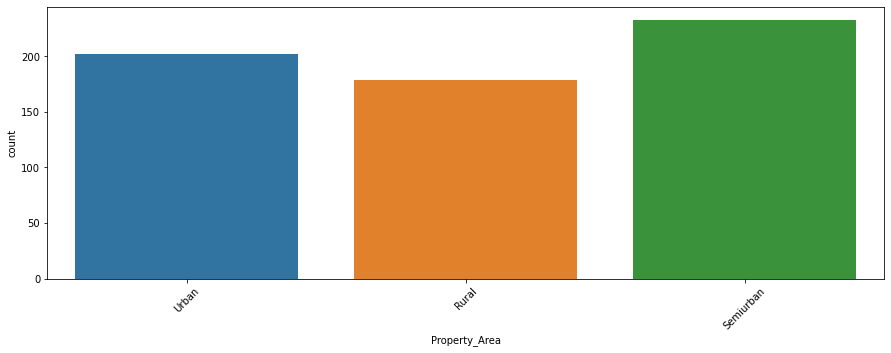

In [19]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Property_Area', data = df)
print('*'*20)
print(df.Property_Area.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

### From the above graph, we observe that most people are from semiurban followed by urban and rural.

********************
Y    422
N    192
Name: Loan_Status, dtype: int64
********************


(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

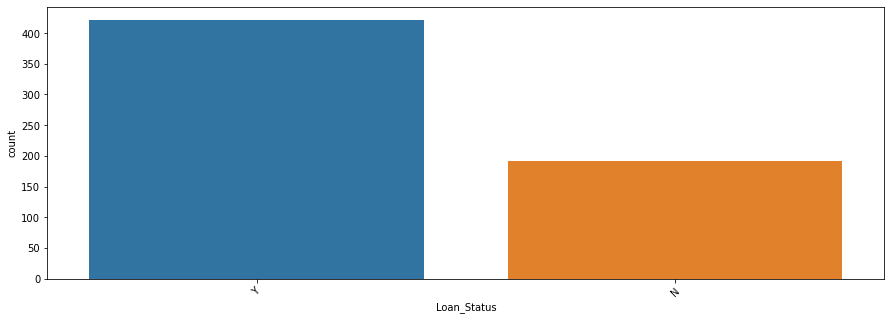

In [20]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Loan_Status', data = df)
print('*'*20)
print(df.Loan_Status.value_counts())
print('*'*20)
plt.xticks(rotation = 45)

In [21]:
df.Loan_Status.value_counts() / len(df.Loan_Status)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### From the above graph and value count, we observe most of the people get their loan and from value count, we observe that our target variable is imbalance around 69% of people get their loan, and 31% of people don't get their loan.

## Applying Label Encoder to categorical columns

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()
df1=le.fit_transform(df['Loan_Status'])
pd.Series(df1)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Length: 614, dtype: int32

In [24]:
df['Loan_Status']=df1

In [25]:
def graphs(x_feature,y_label,df):
    
    print(df[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(df[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = df)
    plt.figure(figsize = (15, 15))

  Married  Loan_Status
1     Yes     0.718204
0      No     0.629108


Yes    401
No     213
Name: Married, dtype: int64




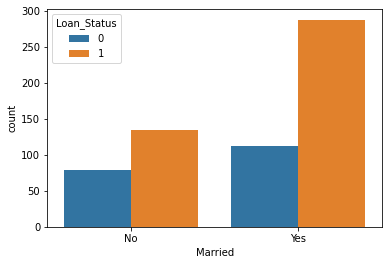

<Figure size 1080x1080 with 0 Axes>

In [26]:
graphs('Married','Loan_Status',df)

### From the above graph, we observe that chance of getting a loan is high when you are married.

      Education  Loan_Status
0      Graduate     0.708333
1  Not Graduate     0.611940


Graduate        480
Not Graduate    134
Name: Education, dtype: int64




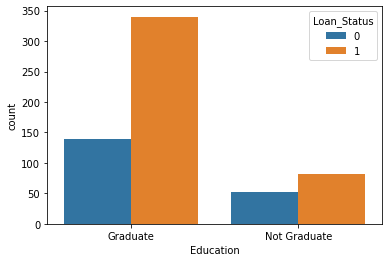

<Figure size 1080x1080 with 0 Axes>

In [27]:
graphs('Education','Loan_Status',df)

### Based on education chances of getting a loan for higher education is very high.

  Self_Employed  Loan_Status
0            No     0.687970
1           Yes     0.682927


No     532
Yes     82
Name: Self_Employed, dtype: int64




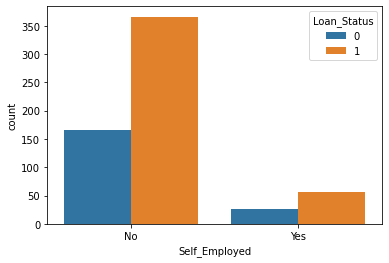

<Figure size 1080x1080 with 0 Axes>

In [28]:
graphs('Self_Employed','Loan_Status',df)

### So from the above graph if you are self-employed the chance of getting a loan is low.

  Property_Area  Loan_Status
1     Semiurban     0.768240
2         Urban     0.658416
0         Rural     0.614525


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64




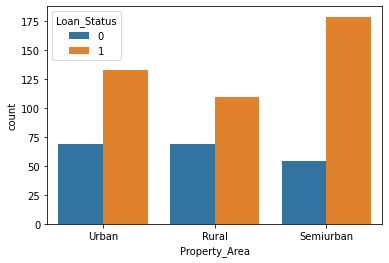

<Figure size 1080x1080 with 0 Axes>

In [29]:
graphs('Property_Area','Loan_Status',df)

### From the above graph, we observe that if the person is from a semiurban the chance of getting a loan is high, followed by Urban and at least Rural.

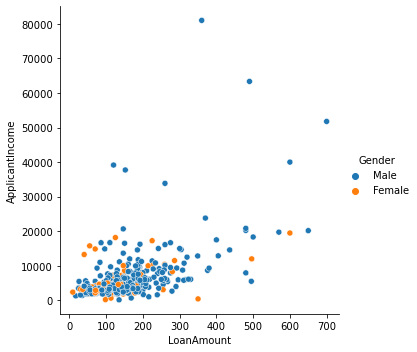

In [30]:
sns.relplot(x='LoanAmount' , y='ApplicantIncome', data = df ,  hue = 'Gender')
plt.show()

### From the regression plot, we observe that the loan amount is mostly from 100k to 300k, and the applicant's income is mostly 10k to 15k.

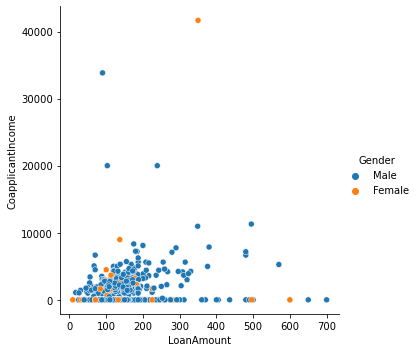

In [31]:
sns.relplot(x='LoanAmount' , y='CoapplicantIncome', data = df ,  hue = 'Gender')
plt.show()

### From the regression plot, we observe that the loan amount is mostly from 100k to 300k, and the co-applicant's income is mostly 0k to 10k.

### Applying Label Encoder to remaining categorical columns

In [32]:
df2=le.fit_transform(df['Gender'])
pd.Series(df1)
df['Gender']=df2

In [33]:
df3=le.fit_transform(df['Married'])
pd.Series(df1)
df['Married']=df3

In [34]:
df4=le.fit_transform(df['Dependents'])
pd.Series(df1)
df['Dependents']=df4

In [35]:
df5=le.fit_transform(df['Education'])
pd.Series(df1)
df['Education']=df5

In [36]:
df6=le.fit_transform(df['Self_Employed'])
pd.Series(df1)
df['Self_Employed']=df6

In [37]:
df7=le.fit_transform(df['Property_Area'])
pd.Series(df1)
df['Property_Area']=df7

### Seperate Label and Feature and Unwanted Column

In [38]:
# seperate label n feature
X=df.drop(['Loan_ID' ,'Loan_Status' ] , axis=1)
y=df.Loan_Status

In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=41)

### Importing SMOTE to treat imblance

In [41]:
#to see how much data is going to y_train set
from collections import Counter
Counter(y_train)

Counter({0: 139, 1: 321})

In [42]:
#balancing the dataset using upsampling or Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE


In [43]:
# coding for SMOTE
ove_smp=SMOTE(0.75)  # how much extra data you want
X_train_ns,y_train_ns=ove_smp.fit_resample(X_train,y_train)
print('the number of classes before fit: ',format(Counter(y_train)))
print('the number of classes after fit: ',format(Counter(y_train_ns)))


# and for future we pass X_train_ns,X_test,y_train_ns,y_test=train_test_split

the number of classes before fit:  Counter({1: 321, 0: 139})
the number of classes after fit:  Counter({1: 321, 0: 240})


In [44]:
#describe dataset
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


### OBSERVATIONS
#There were null values present but we treated it with simple imputer

#There are no duplicate present in dataset

#I have drop Loan_ID column beacuse we dont need it

#In all columns, we see the problem because the standard deviation is greater

#In applicantincome coapplicantincome loan amount we see outliers are presnt beacuse Max value is way more than 75%

## Plotting Heatmap to see co-relation 

In [46]:
corr=df.corr()
corr.shape

(12, 12)

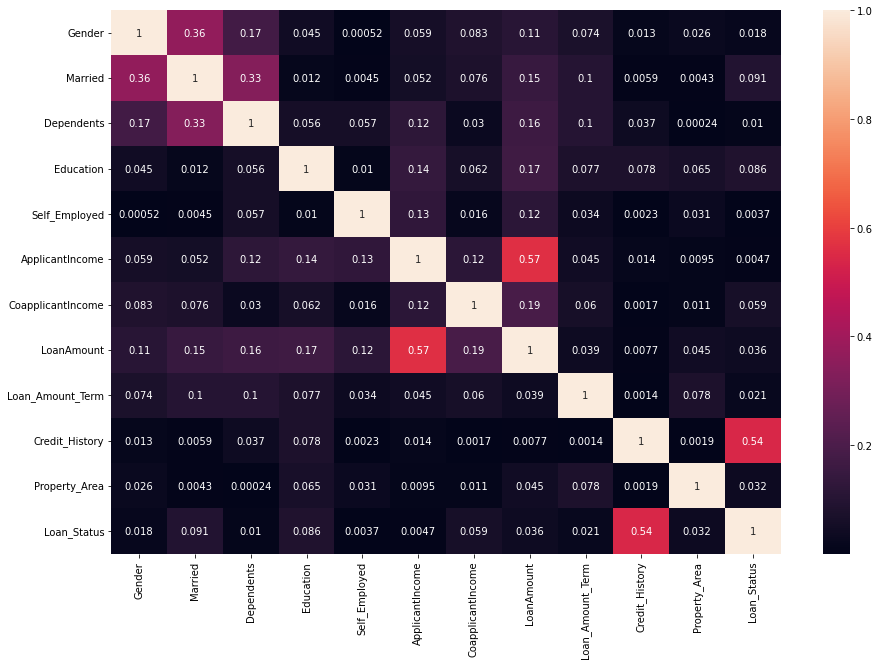

In [47]:
corr=df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

### From the above heatmap, all features contribute a small amount to predict the label (Not-Highly Co-related) and there is no multicollinearity problem exists according to the heatmap.

## Plotting Histogram plot to see how data is distributed on an interval scale.

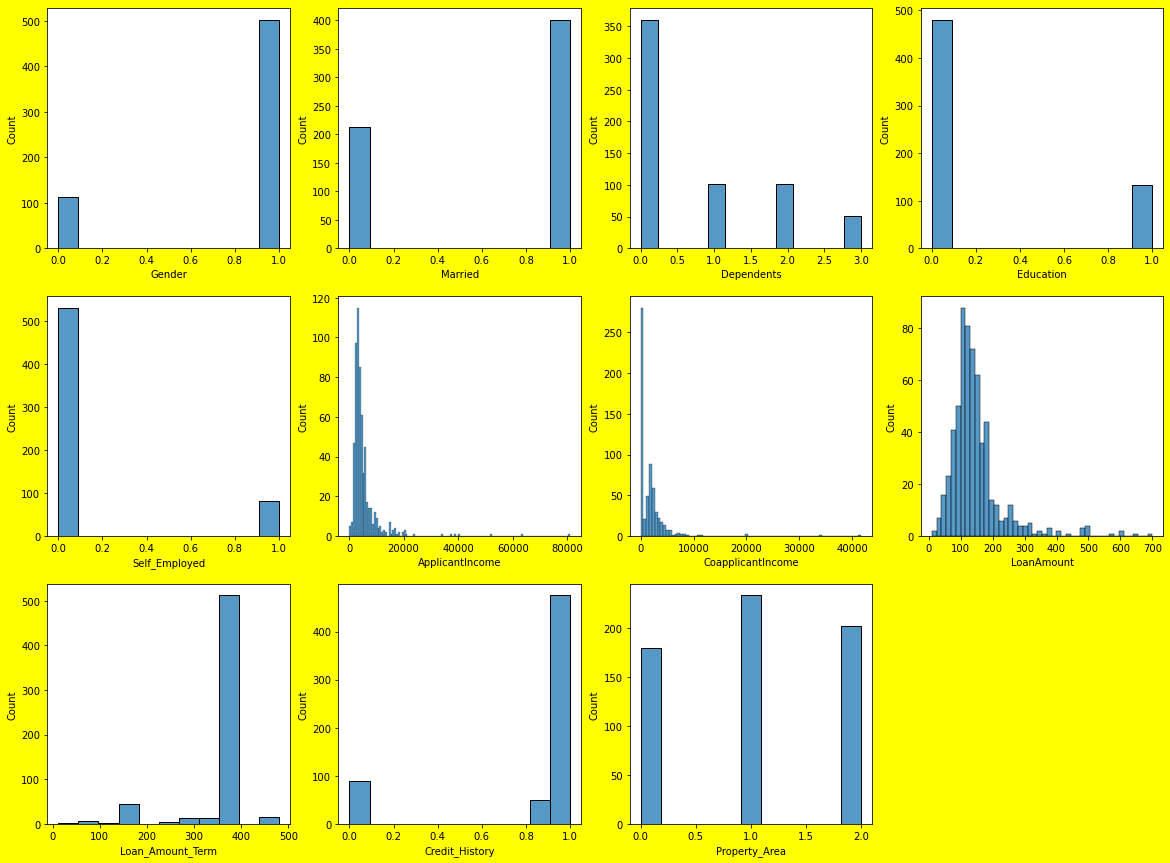

In [49]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.histplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Distribution plot to see how data is distributed 

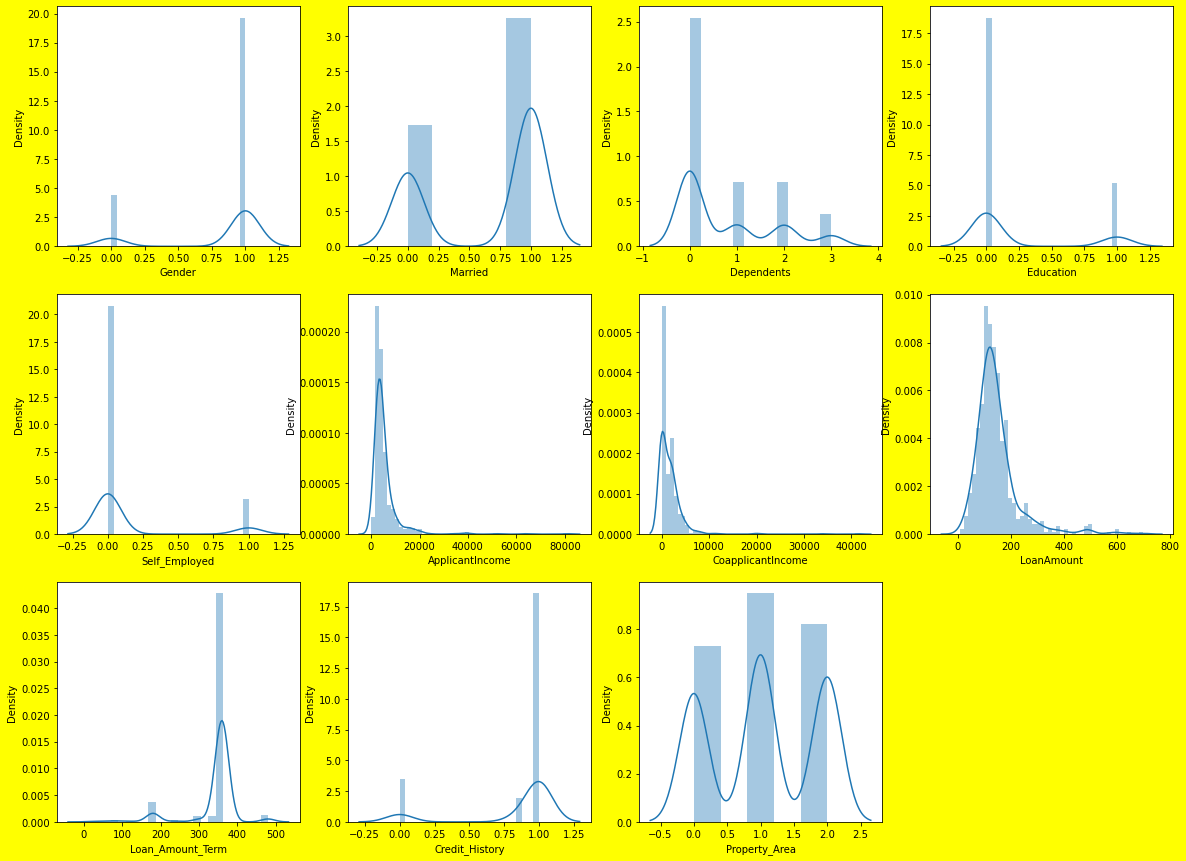

In [50]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the Histogram graph and distribution plot, we can observe the data is skewed in Applicantincome , coapplicantincome , LoanAmount, and Loan_Amount_Term.

## Plotting Scatter plot to see realtion between feature and label

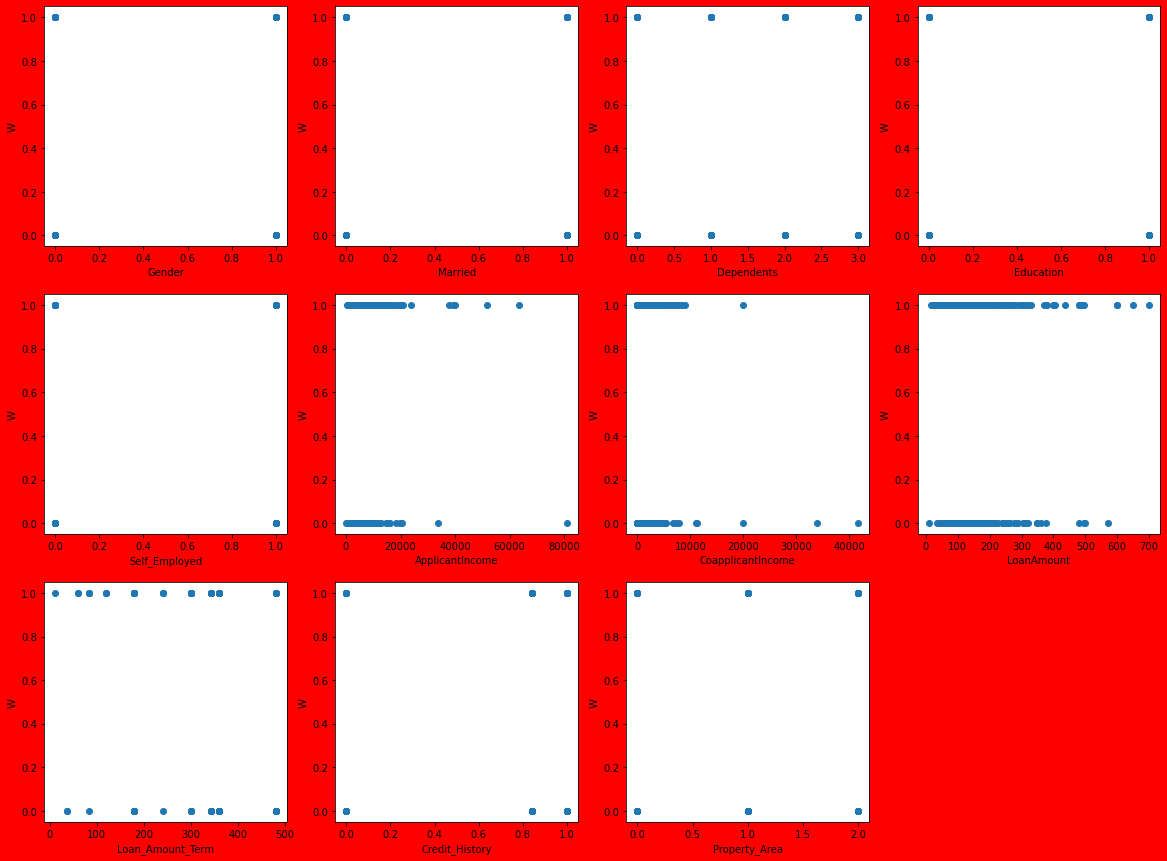

In [51]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,15) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('W' , fontsize = 10)
    plotnumber += 1
plt.show()

## Plotting Regression plot to see realtion between feature and label

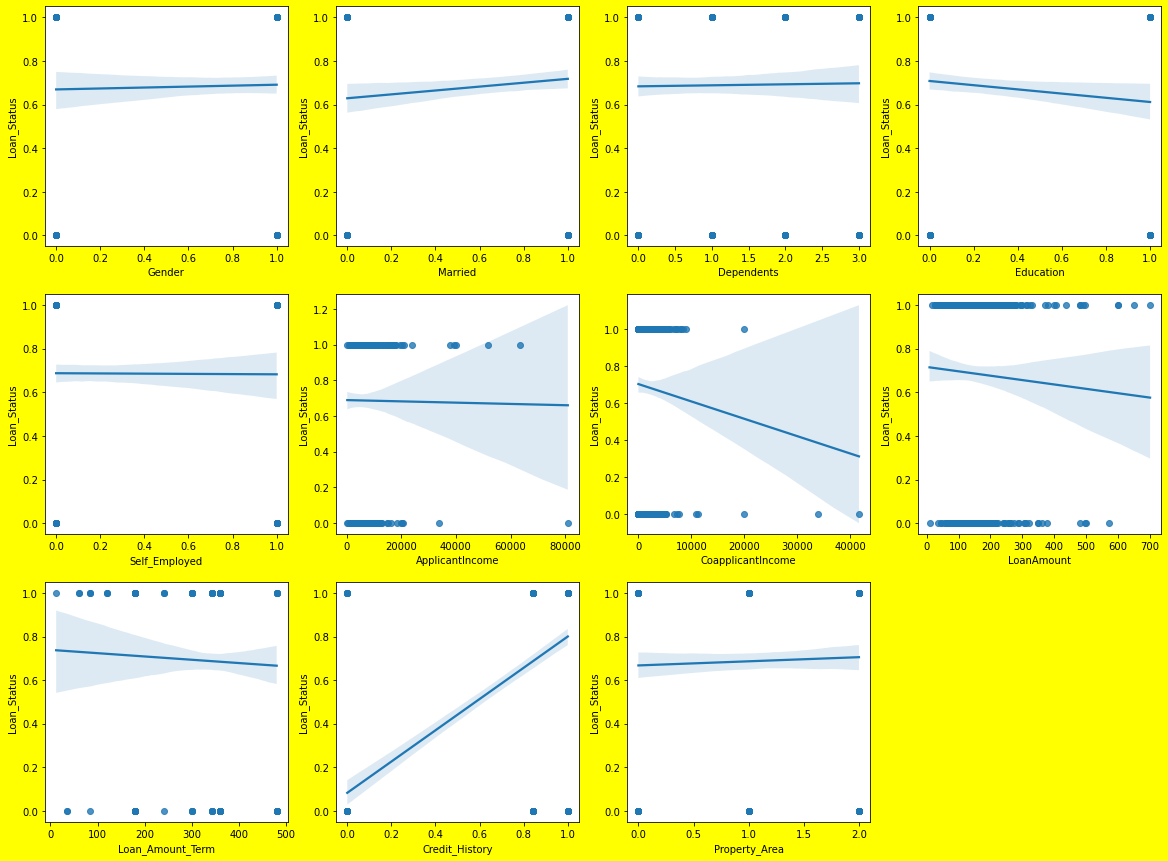

In [52]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.regplot (df[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## From the Scatter plot and regression plot, we can observe that Married, credit history, Dependents, and Property Area are having positive relationships with the label, whereas Gender, Self Employed are neutral and Education, CoapplicantIncome , Loan Amount, Loan amount Term are negatively co-relation with the label.

## Plotting Box plot to see outliers are present are not

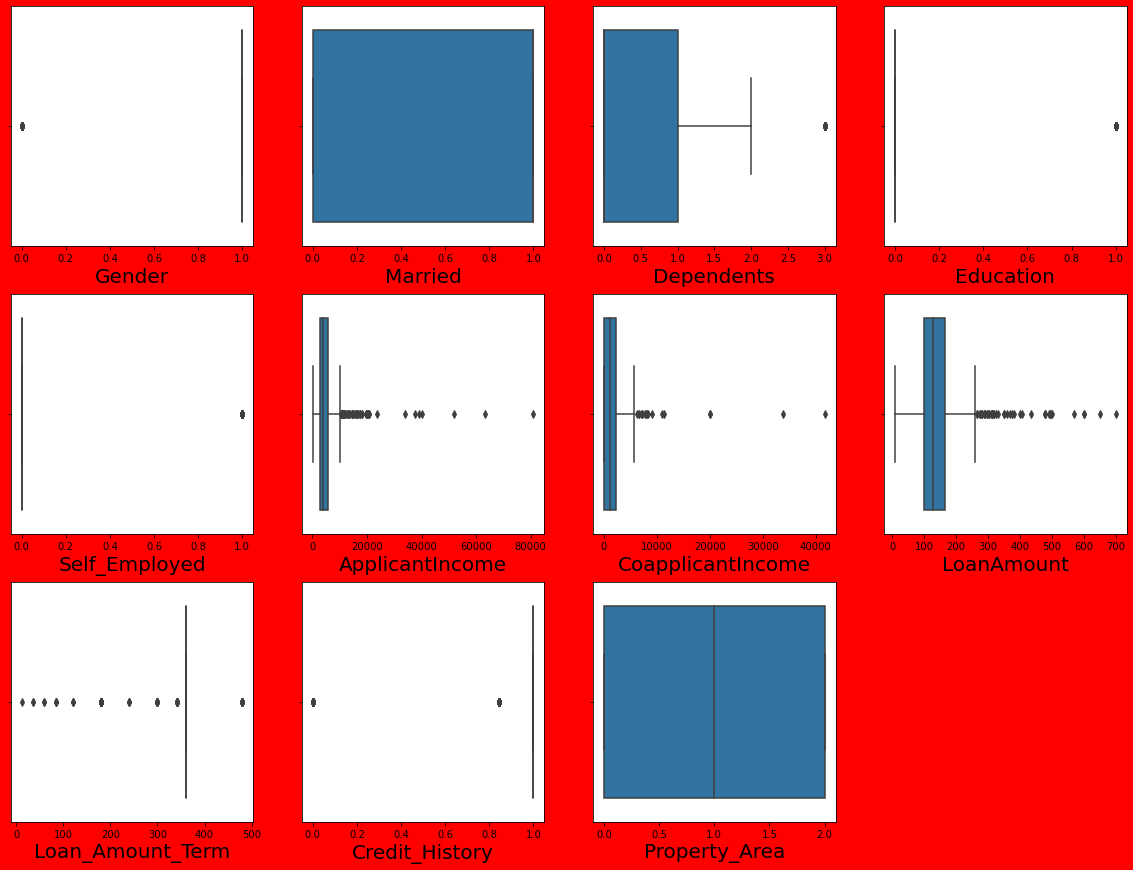

In [53]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in X:
    
    if graph <= 12:
        plt.subplot (3,4,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

## From the box plot, we observe there are a large number of outliers in Applicantincome , coapplicantincome, loan amount, loan amount term, etc.

## Treating the outlier by Zscore method

In [54]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [55]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.5 ).all(axis=1)

df = df[filtering_entry]

df.describe()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,466.000000,466.000000,466.000000,466.000000,466.0,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,0.806867,0.637339,0.675966,0.214592,0.0,4337.538627,1421.229871,134.604280,361.210300,0.844824,1.027897,0.695279
std,0.395181,0.481285,0.981628,0.410980,0.0,2500.726621,1569.024489,54.602608,24.556513,0.346332,0.785127,0.460784
min,0.000000,0.000000,0.000000,0.000000,0.0,150.000000,0.000000,9.000000,240.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.0,2785.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.0,3671.000000,1399.000000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.0,5000.000000,2269.500000,158.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,0.0,16692.000000,8333.000000,330.000000,480.000000,1.000000,2.000000,1.000000


### checking the dataloss after tresting the outliers

In [56]:
print('percentage of loss of data by zscore is :',(df1.shape[0]-df.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.31759656652360513


## finding correlation between feature and lable using CORR method

In [58]:
df.drop('Loan_Status' , axis =1 ).corrwith (df.Loan_Status)

Gender               0.018602
Married              0.092144
Dependents           0.018957
Education           -0.062775
Self_Employed             NaN
ApplicantIncome     -0.024580
CoapplicantIncome    0.055004
LoanAmount          -0.053343
Loan_Amount_Term    -0.117861
Credit_History       0.561955
Property_Area        0.041381
dtype: float64

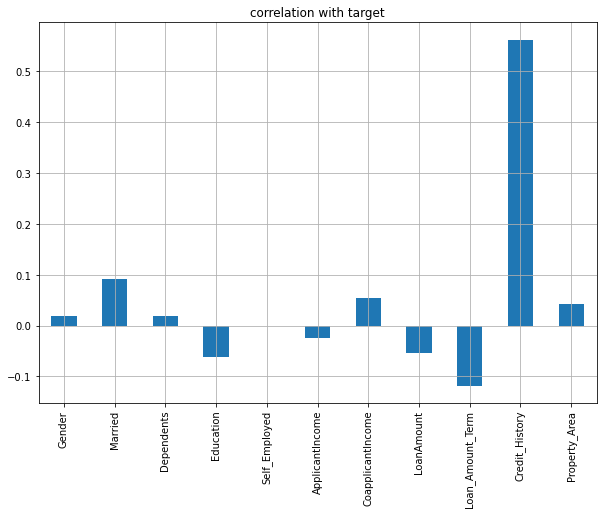

In [59]:
# convert above numbers into graph for better understanding
df.drop('Loan_Status' , axis = 1).corrwith (df.Loan_Status).plot(kind = 'bar' , grid=True , figsize = (10,7) , title = 'correlation with target')

plt.show()

## From the above graph, we observe Married, Gender, Dependents,Coapplicantincome, credit history, and property area are positively co-related to our target variable whereas Education,Applicantincome, LoanAmount, and Loan amount term are negatively correlated.

## Using Select Percentile Feature Selection Technique

In [60]:
### 2ND FEATURE SELECTION TECHNIQUE (SELECT PERCENTILE FEATURE , CHI2)
from sklearn.feature_selection import SelectPercentile , chi2

In [61]:
Spercentile = SelectPercentile(score_func = chi2 , percentile = 80)
sp = Spercentile.fit(X,y) 

In [62]:
# seperate the feature to check the p value
cols = Spercentile.get_support(indices = True)  # this will give you index of 80% feature
print ('feature index'  , cols)

feature = X.columns[cols]                       # this will give you name of that 80% feature
print('feature' , list(feature))

feature index [ 1  3  5  6  7  8  9 10]
feature ['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [63]:
# lets se all the feature vs chi2 score vs pvalue
df_score = pd.DataFrame ({'feature':X.columns , 'chi2_score': Spercentile.scores_ , 'p_value': Spercentile.pvalues_})

df_score.sort_values (by = 'chi2_score' , ascending = False)   # this will give all 100% but we have to select 80%

,feature,chi2_score,p_value
6,CoapplicantIncome,11342.041603,0.000000e+00
5,ApplicantIncome,93.904964,3.310429e-22
7,LoanAmount,39.211545,3.802850e-10
9,Credit_History,25.998867,3.416178e-07
3,Education,3.540502,5.988732e-02
8,Loan_Amount_Term,3.267315,7.067320e-02
1,Married,1.782425,1.818518e-01
10,Property_Area,0.377837,5.387629e-01
2,Dependents,0.085953,7.693869e-01
0,Gender,0.036234,8.490324e-01


### Splitting the feature and label

In [64]:
# create subset of selected 80% feature

XX = df[feature]
y = df['Loan_Status']

### Scaling the data

In [65]:
# import library 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XX_scaler = scaler.fit_transform(XX)

### Checking for the multicollinearity Using VIF

In [66]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(XX_scaler , i) for i in range(XX_scaler.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=XX.columns  # seperate column for column features

vif

,vif,features
0,1.098383,Married
1,1.076127,Education
2,1.703767,ApplicantIncome
3,1.461908,CoapplicantIncome
4,1.826414,LoanAmount
5,1.018924,Loan_Amount_Term
6,1.011271,Credit_History
7,1.042692,Property_Area


# DecisionTreeClassifier Model

In [67]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Finding the best Random state

In [68]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(XX_scaler,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train_ns,y_train_ns)
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7350427350427351 RandomState 1


MAXINING TESTING SCORE 0.7350427350427351 ON RANDOM STATE OF 1
Testing Accuracy 0.7350427350427351 RandomState 2


Testing Accuracy 0.717948717948718 RandomState 3


Testing Accuracy 0.7264957264957265 RandomState 4


Testing Accuracy 0.8034188034188035 RandomState 5


MAXINING TESTING SCORE 0.8034188034188035 ON RANDOM STATE OF 5
Testing Accuracy 0.717948717948718 RandomState 6


Testing Accuracy 0.8034188034188035 RandomState 7


Testing Accuracy 0.7777777777777778 RandomState 8


Testing Accuracy 0.7094017094017094 RandomState 9


Testing Accuracy 0.7435897435897436 RandomState 10


Testing Accuracy 0.6923076923076923 RandomState 11


Testing Accuracy 0.8290598290598291 RandomState 12


MAXINING TESTING SCORE 0.8290598290598291 ON RANDOM STATE OF 12
Testing Accuracy 0.7264957264957265 RandomState 13


Testing Accuracy 0.7094017094017094 RandomState 14


Testing Accuracy 0.7948717948717948 RandomState 15


Testing Accuracy 0.7521367

In [69]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8461538461538461 On Random State 43


### training the data

In [71]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(XX_scaler,y,test_size=0.25,random_state=43)

In [72]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [73]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_ns,y_train_ns)

DecisionTreeClassifier()

In [74]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 82.905983%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.70      0.74      0.72        35
           1       0.89      0.87      0.88        82

    accuracy                           0.83       117
   macro avg       0.80      0.80      0.80       117
weighted avg       0.83      0.83      0.83       117



## Model Score
* Training Score = 100.000000%
* Testing Score = 82.905983%

## Hyperparameter For DecisionTree Classifier

In [75]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [76]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [77]:
#pass dataset to train 
grid_search.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [78]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 9}


In [79]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'entropy', max_depth = 3, min_samples_leaf= 1, min_samples_split= 9)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=9)

In [149]:
# call the function
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_dt,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.375358%
====Testing Score====
Accuracy score : 88.888889%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.89      0.98      0.93        87

    accuracy                           0.89       117
   macro avg       0.90      0.81      0.84       117
weighted avg       0.89      0.89      0.88       117



## Model Scores With Hyperparameter Tuning
* Training Score = 81.375358%
* Testing Score = 88.888889%

## Confusion Matrix DecisionTree Classifier

In [158]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[19, 11],
       [ 2, 85]], dtype=int64)

# RandomForest Classifier Model

In [81]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Finding the best random state

In [82]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(XX_scaler,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train_ns,y_train_ns)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.7948717948717948 RandomState 1


MAXINING TESTING SCORE 0.7948717948717948 ON RANDOM STATE OF 1
Testing Accuracy 0.8290598290598291 RandomState 2


MAXINING TESTING SCORE 0.8290598290598291 ON RANDOM STATE OF 2
Testing Accuracy 0.7777777777777778 RandomState 3


Testing Accuracy 0.8205128205128205 RandomState 4


Testing Accuracy 0.8461538461538461 RandomState 5


MAXINING TESTING SCORE 0.8461538461538461 ON RANDOM STATE OF 5
Testing Accuracy 0.811965811965812 RandomState 6


Testing Accuracy 0.8632478632478633 RandomState 7


MAXINING TESTING SCORE 0.8632478632478633 ON RANDOM STATE OF 7
Testing Accuracy 0.8888888888888888 RandomState 8


MAXINING TESTING SCORE 0.8888888888888888 ON RANDOM STATE OF 8
Testing Accuracy 0.7863247863247863 RandomState 9


Testing Accuracy 0.7777777777777778 RandomState 10


Testing Accuracy 0.7863247863247863 RandomState 11


Testing Accuracy 0.7863247863247863 RandomState 12


Testing Accuracy 0.7692307692307693 RandomState 13


Testin

In [83]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8888888888888888 On Random State 8


### Training the data 

In [85]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(XX_scaler,y,test_size=0.25,random_state=8)

In [86]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [87]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [88]:
# call the function
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 90.598291%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.93      0.74      0.83        35
           1       0.90      0.98      0.94        82

    accuracy                           0.91       117
   macro avg       0.91      0.86      0.88       117
weighted avg       0.91      0.91      0.90       117



## Model Scores 
* Training Score = 100.000000%
* Testing Score = 90.598291%

# Hyperparameter For RandomForestClassifier

In [89]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [90]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)


In [91]:
#pass dataset to train 
grd.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [92]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 3}


In [95]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 15, min_samples_leaf= 2, min_samples_split= 4,n_estimators= 10)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=10)

In [96]:
# call the function
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (rf,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 91.690544%
====Testing Score====
Accuracy score : 86.324786%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.86      0.96      0.91        82

    accuracy                           0.86       117
   macro avg       0.87      0.80      0.82       117
weighted avg       0.87      0.86      0.86       117



## Model Scores With Hyperparameter Tuning
* Training Score = 91.690544%
* Testing Score = 86.324786%

## Confusion Matrix RandomForestClassifier

In [157]:
### if you want to check confusion matrix

y_pred=clf_rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[28,  2],
       [ 1, 86]], dtype=int64)

# Support Vector Machine Model

In [97]:
# Import necessary model #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# svc model 
# for classification
from sklearn.svm import SVC

## Finding the best random state

In [98]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train_ns,X_test,y_train_ns,y_test=train_test_split(XX_scaler,y,test_size=0.25,random_state=i)
    svc=SVC()
    svc.fit(X_train_ns,y_train_ns)
    
    y_pred=svc.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8461538461538461 RandomState 1


MAXINING TESTING SCORE 0.8461538461538461 ON RANDOM STATE OF 1
Testing Accuracy 0.8205128205128205 RandomState 2


Testing Accuracy 0.7863247863247863 RandomState 3


Testing Accuracy 0.811965811965812 RandomState 4


Testing Accuracy 0.8803418803418803 RandomState 5


MAXINING TESTING SCORE 0.8803418803418803 ON RANDOM STATE OF 5
Testing Accuracy 0.8461538461538461 RandomState 6


Testing Accuracy 0.8803418803418803 RandomState 7


Testing Accuracy 0.8717948717948718 RandomState 8


Testing Accuracy 0.8461538461538461 RandomState 9


Testing Accuracy 0.8205128205128205 RandomState 10


Testing Accuracy 0.7863247863247863 RandomState 11


Testing Accuracy 0.8034188034188035 RandomState 12


Testing Accuracy 0.811965811965812 RandomState 13


Testing Accuracy 0.8461538461538461 RandomState 14


Testing Accuracy 0.8461538461538461 RandomState 15


Testing Accuracy 0.8205128205128205 RandomState 16


Testing Accuracy 0.8376068376068376 R

In [99]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.8803418803418803 On Random State 5


### training the data

In [100]:
# train test split
X_train_ns,X_test,y_train_ns,y_test=train_test_split(XX_scaler,y,test_size=0.25,random_state=5)

In [101]:
#write one function and call as many time as you want
def metric_score (clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train_ns,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [102]:
clf_svc=SVC()
clf_svc.fit(X_train_ns,y_train_ns)

SVC()

In [103]:
# call the function
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (clf_svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 82.808023%
====Testing Score====
Accuracy score : 88.034188%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.94      0.55      0.70        29
           1       0.87      0.99      0.93        88

    accuracy                           0.88       117
   macro avg       0.91      0.77      0.81       117
weighted avg       0.89      0.88      0.87       117



##  Model Scores 
* Training Score = 82.808023%
* Testing Score = 88.034188%

## Hyperparameter Tuning for SVC

In [104]:
## HYPERPARAMETER TUNING ##
# here we tune only 2 parameter c and gamma
# where c = how much error we allow model to do 
# gamma = it decide how much curvature we want in a decision boundary 

from sklearn.model_selection import GridSearchCV

In [105]:
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [106]:
# here we are define some parameter and ask gridsearchcv which one is best
gridsearch=GridSearchCV(svc,param_grid)

In [107]:
#pass dataset to train 
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [108]:
#best parameters
gridsearch.best_params_

{'C': 1, 'gamma': 0.01}

In [115]:
# update our model and train again for new score 
svc=SVC(C=15,gamma=0.023)
svc.fit(X_train_ns,y_train_ns)

SVC(C=15, gamma=0.023)

In [116]:
# call the function
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train = True)
metric_score (svc,X_train_ns,X_test,y_train_ns,y_test,train=False)

====Training Score====
Accuracy score : 81.948424%
====Testing Score====
Accuracy score : 88.034188%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.94      0.55      0.70        29
           1       0.87      0.99      0.93        88

    accuracy                           0.88       117
   macro avg       0.91      0.77      0.81       117
weighted avg       0.89      0.88      0.87       117



## Model Scores With Hyperparameter Tuning
* Training Score = 81.948424%
* Testing Score = 88.034188%

## Confusion Matrix for SVC

In [156]:
### if you want to check confusion matrix

y_pred=svc.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[20, 10],
       [ 2, 85]], dtype=int64)

# KNeighborsClassifier Model

In [117]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Finding the best Random State

In [118]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(XX_scaler,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.9145299145299145 RandomState 1


MAXINING TESTING SCORE 0.9145299145299145 ON RANDOM STATE OF 1
Testing Accuracy 0.8461538461538461 RandomState 2


Testing Accuracy 0.905982905982906 RandomState 3


Testing Accuracy 0.8888888888888888 RandomState 4


Testing Accuracy 0.9316239316239316 RandomState 5


MAXINING TESTING SCORE 0.9316239316239316 ON RANDOM STATE OF 5
Testing Accuracy 0.905982905982906 RandomState 6


Testing Accuracy 0.905982905982906 RandomState 7


Testing Accuracy 0.8632478632478633 RandomState 8


Testing Accuracy 0.9145299145299145 RandomState 9


Testing Accuracy 0.8803418803418803 RandomState 10


Testing Accuracy 0.8974358974358975 RandomState 11


Testing Accuracy 0.8974358974358975 RandomState 12


Testing Accuracy 0.9145299145299145 RandomState 13


Testing Accuracy 0.905982905982906 RandomState 14


Testing Accuracy 0.905982905982906 RandomState 15


Testing Accuracy 0.8974358974358975 RandomState 16


Testing Accuracy 0.905982905982906 Rando

In [119]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.9572649572649573 ON RANDOM STATE OF 58


### Training the model

In [128]:
X_train,X_test,y_train,y_test=train_test_split(XX_scaler,y,test_size=0.25,random_state=58)

In [129]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [130]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)


KNeighborsClassifier()

In [131]:
# call the function
metric_score (clf_knn,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 83.381089%
====Testing Score====
Accuracy score : 83.760684%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.70      0.63      0.67        30
           1       0.88      0.91      0.89        87

    accuracy                           0.84       117
   macro avg       0.79      0.77      0.78       117
weighted avg       0.83      0.84      0.83       117



## Model Scores 
* Training Score = 83.381089%
* Testing Score = 83.760684%

## Hyperparameter For KNeighborsClassifier

In [132]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [133]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [134]:
#give the data to object
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [135]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [136]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 11)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

In [137]:
metric_score(clf_knn,X_train,X_test,y_train,y_test,train=True)

metric_score(clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 80.515759%
====Testing Score====
Accuracy score : 86.324786%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.87      0.95      0.91        87

    accuracy                           0.86       117
   macro avg       0.85      0.78      0.80       117
weighted avg       0.86      0.86      0.86       117



## Model Scores With Hyperparameter Tuning
* Training Score = 80.515759%
* Testing Score = 86.324786%

## Confusion Matric for KNN

In [155]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[18, 12],
       [ 4, 83]], dtype=int64)

# Plot AUC-ROC curve for above 4-Models

In [138]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

## AUC-ROC Curve for Training Data

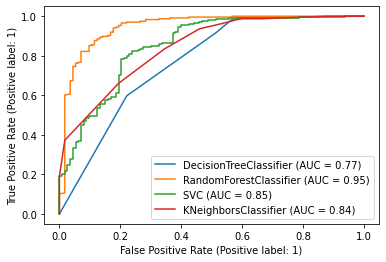

In [139]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Test Data

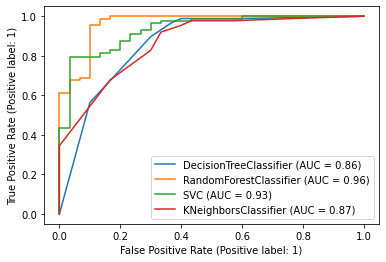

In [140]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

In [141]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'entropy', max_depth = 3, min_samples_leaf= 1, min_samples_split= 9)
clf_dt.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=9)

In [142]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 15, min_samples_leaf= 2, min_samples_split= 4,n_estimators= 10)
rf.fit(X_train_ns,y_train_ns)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=10)

In [143]:
# update our model and train again for new score 
svc=SVC(C=15,gamma=0.023)
svc.fit(X_train_ns,y_train_ns)

SVC(C=15, gamma=0.023)

In [144]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 11)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

## AUC-ROC Curve for Training Data With Hyperparameter tuning

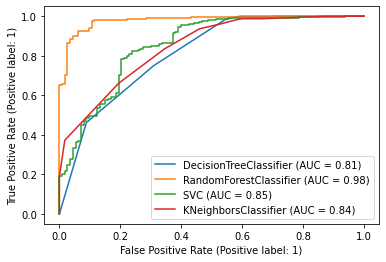

In [145]:
# how well our model works on training data 

disp = plot_roc_curve(clf_dt,X_train_ns,y_train_ns)

plot_roc_curve(rf,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns,ax=disp.ax_)

plot_roc_curve(clf_knn,X_train_ns,y_train_ns,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()


## AUC-ROC Curve for Test Data With Hyperparameter Tuning

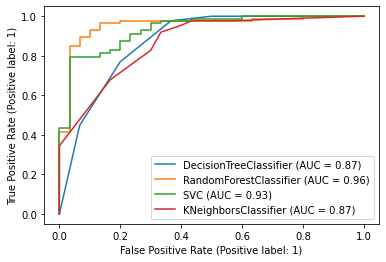

In [146]:
# how well our model works on testing data 

disp = plot_roc_curve(clf_dt,X_test,y_test)

plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(clf_knn,X_test,y_test,ax=disp.ax_)

plt.legend (prop = {'size':10} , loc='lower right')

plt.show()

### For this particular model According to the AUC-ROC curve with hyperparameter tuning Random Forest is the best Model as the training score with hyperparameter is 98% and the testing score is 96% so we select Random Forest as the best model for this particular model.

# Saving the Model

In [ ]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(rf , open ('reg_model' , 'wb'))